In [10]:
from deep_gamma import DATA_PATH
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sb

## Aspen

In [37]:
aspen_base_path = DATA_PATH / "07_model_output" / "aspen_base_fingerprints"
aspen_base_dfs = {
    path.stem: pd.read_csv(path)
    for path in aspen_base_path.glob("*.csv")
}
aspen_pretrained_path = DATA_PATH / "07_model_output" / "aspen_pretrained_fingerprints"
aspen_pretrained_dfs = {
    path.stem: pd.read_csv(path)
    for path in aspen_pretrained_path.glob("*.csv")
}

In [12]:
aspen_base = pd.read_csv(DATA_PATH / "05_model_input" / "aspen" / "train.csv")

### Base model

In [11]:
df = aspen_base_dfs["train_preds"].drop(["smiles_1", "smiles_2"], axis=1)
arr = df.to_numpy()
scaler = StandardScaler()
arr = scaler.fit_transform(arr)
pca = PCA()
X = pca.fit_transform(arr)

In [18]:
pca_df = pd.DataFrame(X[:, :2], columns=["PC1", "PC2"])
pca_df = pd.concat([pca_df, aspen_base], axis=1)

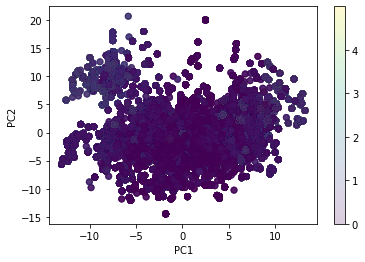

In [35]:
fig, ax = plt.subplots(1)
subset_df = pca_df[pca_df["ln_gamma_1"].abs() < 5]
sc = ax.scatter(
    subset_df["PC1"], 
    subset_df["PC2"], 
    c=subset_df["ln_gamma_1"], 
    alpha=0.2
)
plt.colorbar(sc)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
fig.savefig(DATA_PATH / "08_reporting" / "aspen" / "base_fingerprints_pca.png", dpi=300)

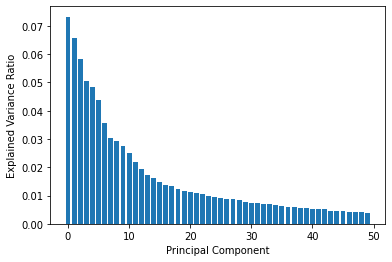

In [36]:
z = pca.explained_variance_ratio_[:50]
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.bar(np.arange(len(z)), z)
plt.savefig(DATA_PATH  / "08_reporting" / "base_fingerprints_pca_explained_varaince.png", dpi=300)

### Pretrained model

In [38]:
df = aspen_pretrained_dfs["train_preds"].drop(["smiles_1", "smiles_2"], axis=1)
arr = df.to_numpy()
scaler = StandardScaler()
arr = scaler.fit_transform(arr)
pca = PCA()
X = pca.fit_transform(arr)

In [39]:
pca_df = pd.DataFrame(X[:, :2], columns=["PC1", "PC2"])
pca_df = pd.concat([pca_df, aspen_base], axis=1)

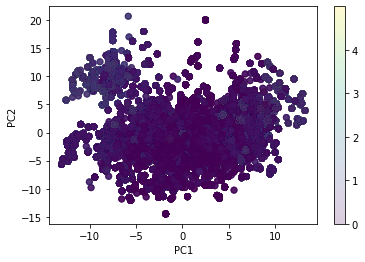

In [40]:
fig, ax = plt.subplots(1)
subset_df = pca_df[pca_df["ln_gamma_1"].abs() < 5]
sc = ax.scatter(
    subset_df["PC1"], 
    subset_df["PC2"], 
    c=subset_df["ln_gamma_1"], 
    alpha=0.2
)
plt.colorbar(sc)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
fig.savefig(DATA_PATH / "08_reporting" / "aspen" / "pretrained_fingerprints_pca.png", dpi=300)